# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [14]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [15]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [16]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

In [20]:
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

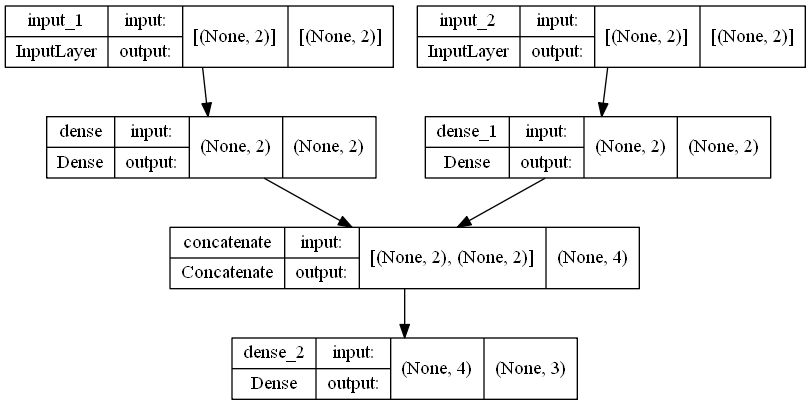

In [17]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [18]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [19]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 73ms/step - loss: 1.5087 - accuracy: 0.3333 - val_loss: 1.5151 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4924 - accuracy: 0.3333 - val_loss: 1.4985 - val_accuracy: 0.3333
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.4766 - accuracy: 0.3333 - val_loss: 1.4828 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.4615 - accuracy: 0.3333 - val_loss: 1.4677 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.4467 - accuracy: 0.3333 - val_loss: 1.4533 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.4340 - accuracy: 0.3333 - val_loss: 1.4388 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.4207 - accuracy: 0.3333 - val_loss: 1.4255 - val_accuracy: 0.3333
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1143 - accuracy: 0.5490 - val_loss: 1.1113 - val_accuracy: 0.5556
Epoch 60/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1118 - accuracy: 0.5392 - val_loss: 1.1084 - val_accuracy: 0.5556
Epoch 61/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1091 - accuracy: 0.5392 - val_loss: 1.1058 - val_accuracy: 0.5556
Epoch 62/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1064 - accuracy: 0.5490 - val_loss: 1.1035 - val_accuracy: 0.5556
Epoch 63/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1040 - accuracy: 0.5490 - val_loss: 1.1011 - val_accuracy: 0.5556
Epoch 64/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1017 - accuracy: 0.5490 - val_loss: 1.0989 - val_accuracy: 0.5556
Epoch 65/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0995 - accuracy: 0.5392 - val_loss: 1.0967 - val_accuracy: 0.5556
Epoch 66

4/4 [==============================] - 0s 10ms/step - loss: 0.9982 - accuracy: 0.3431 - val_loss: 0.9994 - val_accuracy: 0.3889
Epoch 117/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9966 - accuracy: 0.3431 - val_loss: 0.9977 - val_accuracy: 0.3889
Epoch 118/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9950 - accuracy: 0.3431 - val_loss: 0.9958 - val_accuracy: 0.3889
Epoch 119/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9935 - accuracy: 0.3333 - val_loss: 0.9936 - val_accuracy: 0.3889
Epoch 120/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.9914 - accuracy: 0.3235 - val_loss: 0.9917 - val_accuracy: 0.3889
Epoch 121/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9897 - accuracy: 0.3235 - val_loss: 0.9899 - val_accuracy: 0.3889
Epoch 122/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9880 - accuracy: 0.3235 - val_loss: 0.9880 - val_accuracy: 0.3889
Epoch 123/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.9060 - accuracy: 0.6373 - val_loss: 0.9055 - val_accuracy: 0.6667
Epoch 174/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9045 - accuracy: 0.6373 - val_loss: 0.9039 - val_accuracy: 0.6667
Epoch 175/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9031 - accuracy: 0.6373 - val_loss: 0.9025 - val_accuracy: 0.6667
Epoch 176/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9015 - accuracy: 0.6373 - val_loss: 0.9012 - val_accuracy: 0.6667
Epoch 177/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9000 - accuracy: 0.6373 - val_loss: 0.8997 - val_accuracy: 0.6667
Epoch 178/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8985 - accuracy: 0.6373 - val_loss: 0.8981 - val_accuracy: 0.6667
Epoch 179/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8971 - accuracy: 0.6373 - val_loss: 0.8964 - val_accuracy: 0.6667
Epoch 180/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.8211 - accuracy: 0.6471 - val_loss: 0.8215 - val_accuracy: 0.6667
Epoch 231/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.8198 - accuracy: 0.6471 - val_loss: 0.8203 - val_accuracy: 0.6667
Epoch 232/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8183 - accuracy: 0.6471 - val_loss: 0.8187 - val_accuracy: 0.6667
Epoch 233/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8169 - accuracy: 0.6471 - val_loss: 0.8165 - val_accuracy: 0.6667
Epoch 234/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8152 - accuracy: 0.6569 - val_loss: 0.8144 - val_accuracy: 0.6667
Epoch 235/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.8137 - accuracy: 0.6569 - val_loss: 0.8123 - val_accuracy: 0.6667
Epoch 236/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.8123 - accuracy: 0.6569 - val_loss: 0.8104 - val_accuracy: 0.6667
Epoch 237/1000


4/4 [==============================] - 0s 10ms/step - loss: 0.7405 - accuracy: 0.6569 - val_loss: 0.7362 - val_accuracy: 0.6667
Epoch 288/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.7392 - accuracy: 0.6569 - val_loss: 0.7349 - val_accuracy: 0.6667
Epoch 289/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7379 - accuracy: 0.6569 - val_loss: 0.7335 - val_accuracy: 0.6667
Epoch 290/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7365 - accuracy: 0.6569 - val_loss: 0.7322 - val_accuracy: 0.6667
Epoch 291/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7352 - accuracy: 0.6569 - val_loss: 0.7308 - val_accuracy: 0.6667
Epoch 292/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7338 - accuracy: 0.6569 - val_loss: 0.7295 - val_accuracy: 0.6667
Epoch 293/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7325 - accuracy: 0.6569 - val_loss: 0.7281 - val_accuracy: 0.6667
Epoch 294/1000

4/4 [==============================] - 0s 12ms/step - loss: 0.6696 - accuracy: 0.7843 - val_loss: 0.6640 - val_accuracy: 0.8333
Epoch 345/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6685 - accuracy: 0.7843 - val_loss: 0.6629 - val_accuracy: 0.8333
Epoch 346/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6674 - accuracy: 0.7843 - val_loss: 0.6617 - val_accuracy: 0.8889
Epoch 347/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6662 - accuracy: 0.7941 - val_loss: 0.6606 - val_accuracy: 0.8889
Epoch 348/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6651 - accuracy: 0.7941 - val_loss: 0.6594 - val_accuracy: 0.8889
Epoch 349/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6640 - accuracy: 0.7941 - val_loss: 0.6583 - val_accuracy: 0.8889
Epoch 350/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.7941 - val_loss: 0.6571 - val_accuracy: 0.8889
Epoch 351/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.6094 - accuracy: 0.8725 - val_loss: 0.6007 - val_accuracy: 0.9444
Epoch 402/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6086 - accuracy: 0.8725 - val_loss: 0.5996 - val_accuracy: 0.9444
Epoch 403/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6076 - accuracy: 0.8725 - val_loss: 0.5987 - val_accuracy: 0.9444
Epoch 404/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6066 - accuracy: 0.8725 - val_loss: 0.5977 - val_accuracy: 0.9444
Epoch 405/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6057 - accuracy: 0.8725 - val_loss: 0.5968 - val_accuracy: 0.9444
Epoch 406/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6046 - accuracy: 0.8725 - val_loss: 0.5960 - val_accuracy: 0.9444
Epoch 407/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6037 - accuracy: 0.8725 - val_loss: 0.5952 - val_accuracy: 0.9444
Epoch 408/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.5583 - accuracy: 0.9216 - val_loss: 0.5468 - val_accuracy: 0.9444
Epoch 459/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5575 - accuracy: 0.9216 - val_loss: 0.5458 - val_accuracy: 0.9444
Epoch 460/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5567 - accuracy: 0.9216 - val_loss: 0.5449 - val_accuracy: 0.9444
Epoch 461/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5558 - accuracy: 0.9216 - val_loss: 0.5440 - val_accuracy: 0.9444
Epoch 462/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5550 - accuracy: 0.9216 - val_loss: 0.5432 - val_accuracy: 0.9444
Epoch 463/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5541 - accuracy: 0.9314 - val_loss: 0.5424 - val_accuracy: 0.9444
Epoch 464/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5534 - accuracy: 0.9314 - val_loss: 0.5416 - val_accuracy: 0.9444
Epoch 465/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.5145 - accuracy: 0.9314 - val_loss: 0.4987 - val_accuracy: 0.9444
Epoch 516/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.9314 - val_loss: 0.4979 - val_accuracy: 0.9444
Epoch 517/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5131 - accuracy: 0.9314 - val_loss: 0.4971 - val_accuracy: 0.9444
Epoch 518/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5124 - accuracy: 0.9314 - val_loss: 0.4963 - val_accuracy: 0.9444
Epoch 519/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5117 - accuracy: 0.9314 - val_loss: 0.4956 - val_accuracy: 0.9444
Epoch 520/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5110 - accuracy: 0.9314 - val_loss: 0.4948 - val_accuracy: 0.9444
Epoch 521/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5103 - accuracy: 0.9314 - val_loss: 0.4940 - val_accuracy: 0.9444
Epoch 522/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.4760 - accuracy: 0.9314 - val_loss: 0.4574 - val_accuracy: 0.9444
Epoch 573/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4753 - accuracy: 0.9314 - val_loss: 0.4566 - val_accuracy: 0.9444
Epoch 574/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4747 - accuracy: 0.9314 - val_loss: 0.4558 - val_accuracy: 0.9444
Epoch 575/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4741 - accuracy: 0.9314 - val_loss: 0.4550 - val_accuracy: 0.9444
Epoch 576/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4734 - accuracy: 0.9314 - val_loss: 0.4543 - val_accuracy: 0.9444
Epoch 577/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4729 - accuracy: 0.9314 - val_loss: 0.4537 - val_accuracy: 0.9444
Epoch 578/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4722 - accuracy: 0.9314 - val_loss: 0.4530 - val_accuracy: 0.9444
Epoch 579/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.4423 - accuracy: 0.9314 - val_loss: 0.4208 - val_accuracy: 0.9444
Epoch 630/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4418 - accuracy: 0.9314 - val_loss: 0.4204 - val_accuracy: 0.9444
Epoch 631/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4412 - accuracy: 0.9314 - val_loss: 0.4199 - val_accuracy: 0.9444
Epoch 632/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4408 - accuracy: 0.9314 - val_loss: 0.4193 - val_accuracy: 0.9444
Epoch 633/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4402 - accuracy: 0.9314 - val_loss: 0.4187 - val_accuracy: 0.9444
Epoch 634/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4395 - accuracy: 0.9314 - val_loss: 0.4179 - val_accuracy: 0.9444
Epoch 635/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4390 - accuracy: 0.9314 - val_loss: 0.4171 - val_accuracy: 0.9444
Epoch 636/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.4118 - accuracy: 0.9314 - val_loss: 0.3874 - val_accuracy: 0.9444
Epoch 687/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4112 - accuracy: 0.9314 - val_loss: 0.3868 - val_accuracy: 0.9444
Epoch 688/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4107 - accuracy: 0.9314 - val_loss: 0.3863 - val_accuracy: 0.9444
Epoch 689/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4102 - accuracy: 0.9314 - val_loss: 0.3858 - val_accuracy: 0.9444
Epoch 690/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4097 - accuracy: 0.9314 - val_loss: 0.3853 - val_accuracy: 0.9444
Epoch 691/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.4091 - accuracy: 0.9314 - val_loss: 0.3848 - val_accuracy: 0.9444
Epoch 692/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.4086 - accuracy: 0.9314 - val_loss: 0.3844 - val_accuracy: 0.9444
Epoch 693/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.3845 - accuracy: 0.9314 - val_loss: 0.3582 - val_accuracy: 0.9444
Epoch 744/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3841 - accuracy: 0.9314 - val_loss: 0.3577 - val_accuracy: 0.9444
Epoch 745/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3836 - accuracy: 0.9314 - val_loss: 0.3572 - val_accuracy: 0.9444
Epoch 746/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3831 - accuracy: 0.9314 - val_loss: 0.3567 - val_accuracy: 0.9444
Epoch 747/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3826 - accuracy: 0.9314 - val_loss: 0.3563 - val_accuracy: 0.9444
Epoch 748/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3822 - accuracy: 0.9314 - val_loss: 0.3558 - val_accuracy: 0.9444
Epoch 749/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3817 - accuracy: 0.9314 - val_loss: 0.3554 - val_accuracy: 0.9444
Epoch 750/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.3598 - accuracy: 0.9314 - val_loss: 0.3322 - val_accuracy: 0.9444
Epoch 801/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3594 - accuracy: 0.9314 - val_loss: 0.3318 - val_accuracy: 0.9444
Epoch 802/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3590 - accuracy: 0.9314 - val_loss: 0.3313 - val_accuracy: 0.9444
Epoch 803/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3585 - accuracy: 0.9314 - val_loss: 0.3308 - val_accuracy: 0.9444
Epoch 804/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3581 - accuracy: 0.9314 - val_loss: 0.3303 - val_accuracy: 0.9444
Epoch 805/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3576 - accuracy: 0.9314 - val_loss: 0.3297 - val_accuracy: 0.9444
Epoch 806/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3572 - accuracy: 0.9314 - val_loss: 0.3293 - val_accuracy: 0.9444
Epoch 807/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.3377 - accuracy: 0.9510 - val_loss: 0.3086 - val_accuracy: 0.9444
Epoch 858/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3373 - accuracy: 0.9510 - val_loss: 0.3082 - val_accuracy: 0.9444
Epoch 859/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3369 - accuracy: 0.9510 - val_loss: 0.3080 - val_accuracy: 0.9444
Epoch 860/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3367 - accuracy: 0.9510 - val_loss: 0.3078 - val_accuracy: 0.9444
Epoch 861/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3364 - accuracy: 0.9510 - val_loss: 0.3071 - val_accuracy: 0.9444
Epoch 862/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3359 - accuracy: 0.9510 - val_loss: 0.3067 - val_accuracy: 0.9444
Epoch 863/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3355 - accuracy: 0.9510 - val_loss: 0.3062 - val_accuracy: 0.9444
Epoch 864/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.3179 - accuracy: 0.9510 - val_loss: 0.2869 - val_accuracy: 0.9444
Epoch 915/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3178 - accuracy: 0.9510 - val_loss: 0.2864 - val_accuracy: 0.9444
Epoch 916/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3173 - accuracy: 0.9510 - val_loss: 0.2860 - val_accuracy: 0.9444
Epoch 917/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3170 - accuracy: 0.9510 - val_loss: 0.2857 - val_accuracy: 0.9444
Epoch 918/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3167 - accuracy: 0.9510 - val_loss: 0.2853 - val_accuracy: 0.9444
Epoch 919/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.3163 - accuracy: 0.9510 - val_loss: 0.2850 - val_accuracy: 0.9444
Epoch 920/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.3159 - accuracy: 0.9510 - val_loss: 0.2848 - val_accuracy: 0.9444
Epoch 921/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.2995 - accuracy: 0.9510 - val_loss: 0.2697 - val_accuracy: 0.9444
Epoch 972/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2993 - accuracy: 0.9510 - val_loss: 0.2695 - val_accuracy: 0.9444
Epoch 973/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2990 - accuracy: 0.9510 - val_loss: 0.2689 - val_accuracy: 0.9444
Epoch 974/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2986 - accuracy: 0.9510 - val_loss: 0.2681 - val_accuracy: 0.9444
Epoch 975/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2982 - accuracy: 0.9510 - val_loss: 0.2672 - val_accuracy: 0.9444
Epoch 976/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2980 - accuracy: 0.9510 - val_loss: 0.2664 - val_accuracy: 0.9444
Epoch 977/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2978 - accuracy: 0.9510 - val_loss: 0.2659 - val_accuracy: 0.9444
Epoch 978/1000

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [8]:
iris = load_iris()

x = iris.data
y = iris.target

In [9]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,y,test_size=0.2,random_state=2022)

## **length끼리, width끼리**

In [11]:
x_train_length = x_train.loc[:,['sepal length (cm)','petal length (cm)']]
x_train_width = x_train.loc[:,['sepal width (cm)','petal width (cm)']]

## One-hot Encoding

In [13]:
# y값이 몇 가지 있는지 확인
print(np.unique(y_train))

[0 1 2]


In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [15]:
# 확인
y_train.shape, y_test.shape

((120, 3), (30, 3))

## Modeling : multi-input & Concatenate layer

In [17]:
x_train_length.shape

(120, 2)

In [27]:
# 세션 초기화
keras.backend.clear_session()

# 레이어 생성
il1 = keras.layers.Input(shape=(2,))
hl1 = keras.layers.Dense(2, activation='relu')(il1)

il2 = keras.layers.Input(shape=(2,))
hl2 = keras.layers.Dense(2, activation='relu')(il2)

cl = keras.layers.Concatenate()([hl1,hl2])
ol = keras.layers.Dense(3,activation='softmax')(cl)

# 모델 생성
model = keras.models.Model([il1,il2],ol)

# 모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [23]:
# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

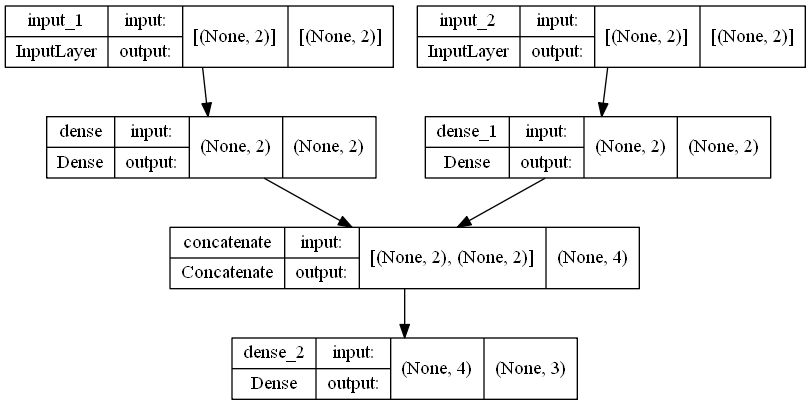

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

## 학습 시켜보기!

In [25]:
# EarlyStopping 정의
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=10, min_delta=0, verbose=1, restore_best_weights=True)

In [28]:
model.fit([x_train_length,x_train_width],y_train,epochs=1000,verbose=1, validation_split=0.1,callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 64ms/step - loss: 1.2826 - accuracy: 0.2315 - val_loss: 1.3806 - val_accuracy: 0.1667
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.2759 - accuracy: 0.3704 - val_loss: 1.3692 - val_accuracy: 0.1667
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.2687 - accuracy: 0.3704 - val_loss: 1.3589 - val_accuracy: 0.1667
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.2621 - accuracy: 0.3704 - val_loss: 1.3487 - val_accuracy: 0.1667
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.2551 - accuracy: 0.3704 - val_loss: 1.3388 - val_accuracy: 0.1667
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.2487 - accuracy: 0.3704 - val_loss: 1.3286 - val_accuracy: 0.1667
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.2416 - accuracy: 0.3704 - val_loss: 1.3187 - val_accuracy: 0.1667
Epoch 8/1000


4/4 [==============================] - 0s 10ms/step - loss: 1.0981 - accuracy: 0.3704 - val_loss: 1.1050 - val_accuracy: 0.1667
Epoch 59/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0980 - accuracy: 0.3704 - val_loss: 1.1050 - val_accuracy: 0.1667
Epoch 60/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0978 - accuracy: 0.3704 - val_loss: 1.1051 - val_accuracy: 0.1667
Epoch 61/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0977 - accuracy: 0.3704 - val_loss: 1.1052 - val_accuracy: 0.1667
Epoch 62/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.0976 - accuracy: 0.3704 - val_loss: 1.1054 - val_accuracy: 0.1667
Epoch 63/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0975 - accuracy: 0.3704 - val_loss: 1.1057 - val_accuracy: 0.1667
Epoch 64/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0974 - accuracy: 0.3704 - val_loss: 1.1061 - val_accuracy: 0.1667
Epoch 65/1000
4/4 [===